# INCOME CLASSIFICATION USING KNN

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

### Uploading file from local directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving income_evaluation.csv to income_evaluation.csv


### Load Data

In [3]:
dataset = pd.read_csv("income_evaluation.csv")
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Summarise Data

In [5]:
dataset.shape

(32561, 15)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Dropping unwanted columns

In [12]:
dataset = dataset.drop([' workclass',' fnlwgt',' education',' marital-status',' occupation',' relationship',' race',' sex',' capital-loss',' native-country'],axis=1)
dataset.head()

,age,education-num,capital-gain,hours-per-week,income
0,39,13,2174,40,<=50K
1,50,13,0,13,<=50K
2,38,9,0,40,<=50K
3,53,7,0,40,<=50K
4,28,13,0,40,<=50K


### Mapping Income Data to Binary

In [31]:
income_set = set(dataset[' income'])
dataset[' income'] = dataset[' income'].map({' <=50K':0, ' >50K':1}).astype(int)
dataset.head()

,age,education-num,capital-gain,hours-per-week,income
0,39,13,2174,40,0
1,50,13,0,13,0
2,38,9,0,40,0
3,53,7,0,40,0
4,28,13,0,40,0


### Segregating Data into INPUT X and OUTPUT Y

In [32]:
X = dataset.iloc[:,:-1].values
X

array([[   39,    13,  2174,    40],
       [   50,    13,     0,    13],
       [   38,     9,     0,    40],
       ...,
       [   58,     9,     0,    40],
       [   22,     9,     0,    20],
       [   52,     9, 15024,    40]])

In [33]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 0, 0, 1])

### Splitting the Data 

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25, random_state = 0)

### Scaling the Data

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### Finding K value

Text(0, 0.5, 'Mean error')

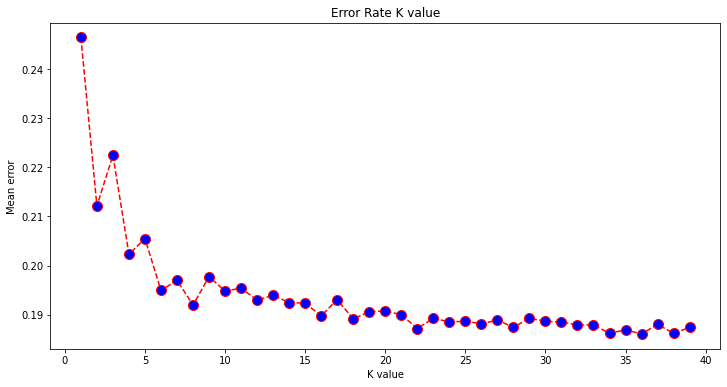

In [36]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Calculating error for K values between 1 and 40
for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)
  pred_i = model.predict(X_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean error')


### Training 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=6)

### Prediction

In [38]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

### Model Accuracy

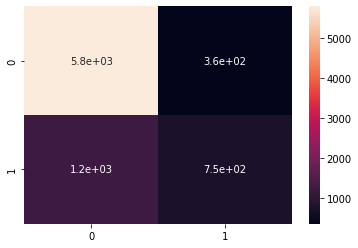

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [40]:
score = accuracy_score(y_test,y_pred)
print("Accuracy of the Model :{0}".format(score*100))

Accuracy of the Model :80.50608033411129


### Predicting the Income

In [41]:
age = int(input("Enter the age :"))
edu = int(input("Enter the education number :"))
cap_gain = int(input("Enter the capital gain :"))
hrs_week = int(input("Enter the hours per week :"))
newEmp = [[age,edu,cap_gain,hrs_week]]
result = model.predict(sc.transform(newEmp))
if result==1:
  print("Employee income above 50k")
else:
  print("Employee income below 50k")

Enter the age :24
Enter the education number :13
Enter the capital gain :1500
Enter the hours per week :36
Employee income below 50k
